# Code for Chapter 1.  

In this case we will review some of the basic R functions and coding paradigms we will use throughout this book. This includes loading, viewing, and cleaning raw data; as well as some basic visualization.  This specific case we will use data from reported UFO sightings to investigate what, if any, seasonal trends exists in the data.

## Load data

In [171]:
import pandas as pd

df = pd.read_csv('data/ufo/ufo_awesome.tsv', sep='\t', error_bad_lines=False, header=None)
df.shape

#error_bad_lines=False - for some lines the last column which contains a description, contains also invalid character \t, which is separator for us. We ignore it.

b'Skipping line 755: expected 6 fields, saw 7\nSkipping line 1167: expected 6 fields, saw 7\nSkipping line 1569: expected 6 fields, saw 13\nSkipping line 1571: expected 6 fields, saw 7\nSkipping line 1659: expected 6 fields, saw 10\nSkipping line 1951: expected 6 fields, saw 7\nSkipping line 2077: expected 6 fields, saw 12\nSkipping line 2382: expected 6 fields, saw 11\nSkipping line 2753: expected 6 fields, saw 8\nSkipping line 3076: expected 6 fields, saw 13\nSkipping line 3218: expected 6 fields, saw 8\nSkipping line 3238: expected 6 fields, saw 7\nSkipping line 3346: expected 6 fields, saw 7\nSkipping line 3453: expected 6 fields, saw 8\nSkipping line 3513: expected 6 fields, saw 7\nSkipping line 3571: expected 6 fields, saw 7\nSkipping line 3632: expected 6 fields, saw 8\nSkipping line 3718: expected 6 fields, saw 7\nSkipping line 3814: expected 6 fields, saw 9\nSkipping line 4607: expected 6 fields, saw 10\nSkipping line 4627: expected 6 fields, saw 9\nSkipping line 4666: expecte

(61069, 6)

In [97]:
df.head()

,0,1,2,3,4,5
0,19951009,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by..."
1,19951010,19951011,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
2,19950101,19950103,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...
3,19950510,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...
4,19950611,19950614,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...


## Set columns names

In [98]:
df.columns = ["DateOccurred","DateReported","Location","ShortDescription",
"Duration","LongDescription"]

## Check data size for the DateOccurred and DateReported columns

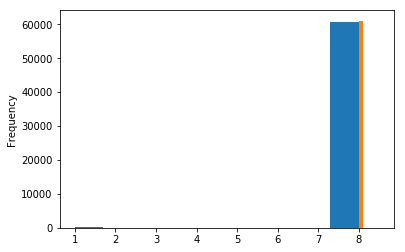

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
df['DateOccurred'].astype(str).str.len().plot(kind='hist')
df['DateReported'].astype(str).str.len().plot(kind='hist')

## Remove rows with incorrect dates (length not eqauls 8)

In [100]:
mask = (df['DateReported'].astype('str').str.len() == 8) & (df['DateOccurred'].astype('str').str.len() == 8)
    
df = df.loc[mask]

df.shape

(60817, 6)

## Convert the DateReported and  DateOccurred columns to Date type

In [109]:
df['DateReported'] = pd.to_datetime(df['DateReported'], format='%Y%m%d', errors='coerce')
df['DateOccurred'] = pd.to_datetime(df['DateOccurred'], format='%Y%m%d', errors='coerce')

## Split the 'Locaton' column to two new columns: 'City' and 'State'

In [110]:
df_location = df['Location'].str.partition(', ')[[0, 2]]
df_location.columns = ['USCity', 'USState']
df['USCity'] = df_location['USCity']
df['USState'] = df_location['USState']

df.head()

,DateOccurred,DateReported,Location,ShortDescription,Duration,LongDescription,USCity,USState
0,1995-10-09,1995-10-09,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by...",Iowa City,IA
1,1995-10-10,1995-10-11,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri...",Milwaukee,WI
2,1995-01-01,1995-01-03,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...,Shelton,WA
3,1995-05-10,1995-05-10,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...,Columbia,MO
4,1995-06-11,1995-06-14,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...,Seattle,WA


## Keep rows only with correct US states

In [111]:
USStates = ["AK","AL","AR","AZ","CA","CO","CT","DE","FL","GA","HI","IA","ID","IL",
"IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND","NE","NH",
"NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VA","VT",
"WA","WI","WV","WY"]

df = df[df['USState'].isin(USStates)]

df.head()

,DateOccurred,DateReported,Location,ShortDescription,Duration,LongDescription,USCity,USState
0,1995-10-09,1995-10-09,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by...",Iowa City,IA
1,1995-10-10,1995-10-11,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri...",Milwaukee,WI
2,1995-01-01,1995-01-03,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...,Shelton,WA
3,1995-05-10,1995-05-10,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...,Columbia,MO
4,1995-06-11,1995-06-14,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...,Seattle,WA


## Creating a histogram of frequencies for UFO sightings over time

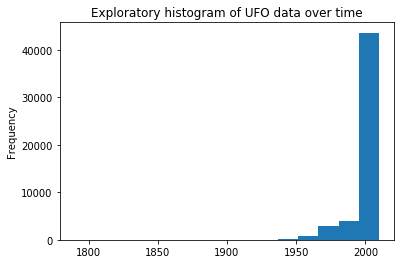

In [114]:
df['DateOccurred'].dt.year.plot(kind='hist', bins=15, title='Exploratory histogram of UFO data over time')

## We will only look at incidents that occurred from 1990 to the most recent

In [116]:
df = df[(df['DateOccurred'] >= '1990-01-01')]

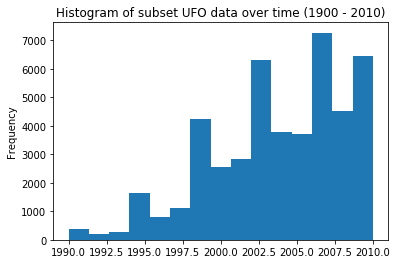

In [117]:
df['DateOccurred'].dt.year.plot(kind='hist', bins=15, title='Histogram of subset UFO data over time (1900 - 2010)')

## Create finally histogram of subset UFO data over time (1900 - 2010) by US state

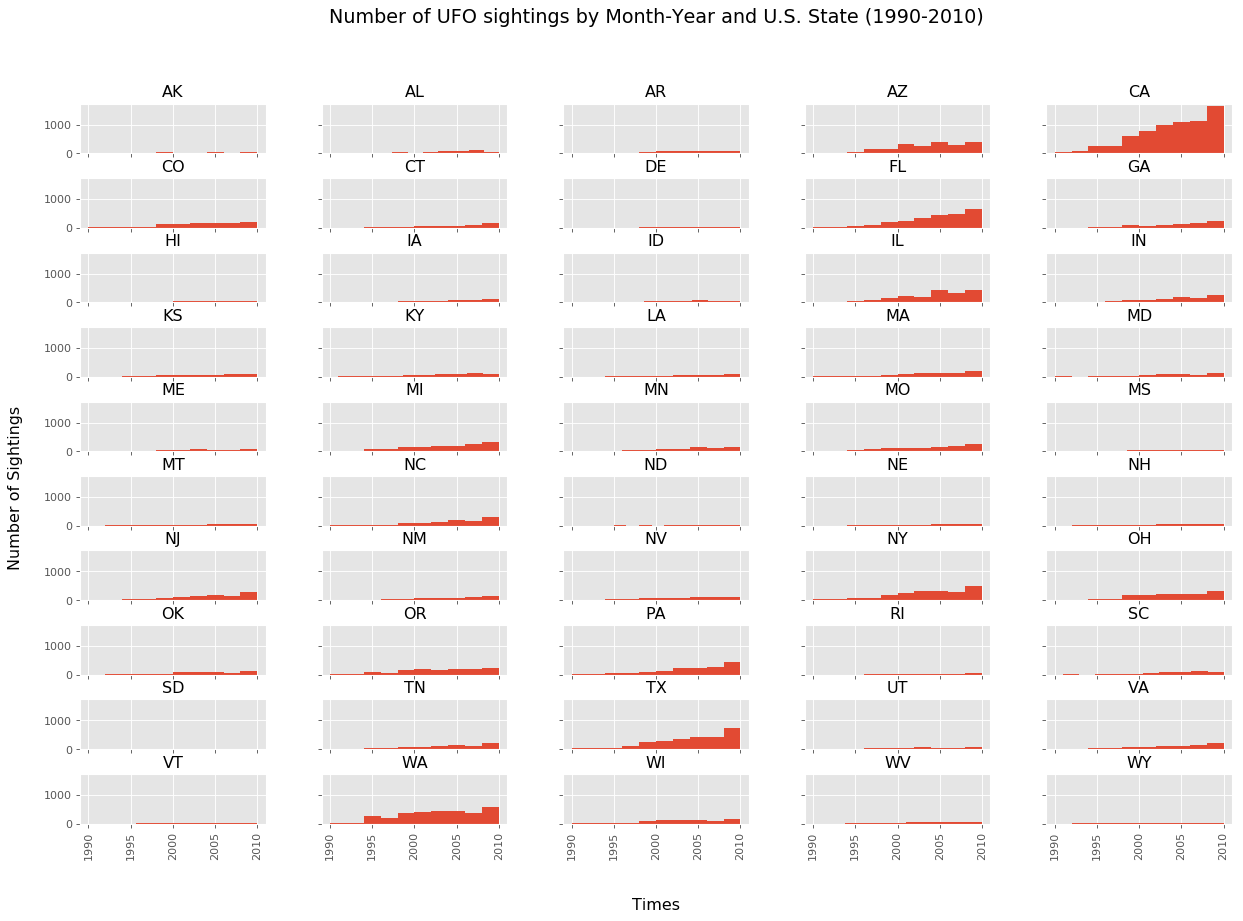

In [169]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# set up figure & axes
fig, axes = plt.subplots(nrows=10, ncols=5, sharex=True, sharey=True, figsize=(18, 12), dpi= 80)

# drop sharex, sharey, layout & add ax=axes
df['YearOccurred'] = df['DateOccurred'].dt.year
df.hist(column='YearOccurred',by='USState', ax=axes)

# set title and axis labels
plt.suptitle('Number of UFO sightings by Month-Year and U.S. State (1990-2010)', x=0.5, y=1, ha='center', fontsize='xx-large')
fig.text(0.5, 0.06, 'Times', ha='center', fontsize='x-large')
fig.text(0.05, 0.5, 'Number of Sightings', va='center', rotation='vertical', fontsize='x-large')
plt.savefig('images/ufo_sightings.pdf', format='pdf')